# Drug Performance Research Project

In [164]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

## Exploring the dataset (Data Cleaning and Aggregation)

In [11]:
# Importing raw data
data = pd.read_csv(r"C:\Users\aidan\Downloads\drugs_side_effects_drugs_com.csv\drugs_side_effects_drugs_com.csv")
data_df = pd.DataFrame(data)
data_df

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html


In [9]:
data_df.columns

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

In [13]:
data_df['drug_name'].unique

<bound method Series.unique of 0          doxycycline
1       spironolactone
2          minocycline
3             Accutane
4          clindamycin
             ...      
2926     benzphetamine
2927      fenfluramine
2928       Fendique ER
2929          Imcivree
2930     setmelanotide
Name: drug_name, Length: 2931, dtype: object>

In [32]:
medical_conditions = data_df['medical_condition'].unique()
print(medical_conditions)
print('Number of Medical Conditions:',len(medical_conditions))

['Acne' 'ADHD' 'AIDS/HIV' 'Allergies' "Alzheimer's" 'Angina' 'Anxiety'
 'Asthma' 'Bipolar Disorder' 'Bronchitis' 'Cancer' 'Cholesterol'
 'Colds & Flu' 'Constipation' 'COPD' 'Covid 19' 'Depression'
 'Diabetes (Type 1)' 'Diabetes (Type 2)' 'Diarrhea' 'Eczema'
 'Erectile Dysfunction' 'Gastrointestinal' 'GERD (Heartburn)' 'Gout'
 'Hair Loss' 'Hayfever' 'Herpes' 'Hypertension' 'Hypothyroidism'
 'IBD (Bowel)' 'Incontinence' 'Insomnia' 'Menopause' 'Migraine'
 'Osteoarthritis' 'Osteoporosis' 'Pain' 'Pneumonia' 'Psoriasis'
 'Rheumatoid Arthritis' 'Schizophrenia' 'Seizures' 'Stroke' 'Swine Flu'
 'UTI' 'Weight Loss']
Number of Medical Conditions: 47


In [14]:
data_df['drug_classes'].unique() 

array(['Miscellaneous antimalarials, Tetracyclines',
       'Aldosterone receptor antagonists, Potassium-sparing diuretics',
       'Tetracyclines',
       'Miscellaneous antineoplastics, Miscellaneous uncategorized agents',
       'Topical acne agents, Vaginal anti-infectives',
       'Topical acne agents', 'Sulfonamides',
       'First generation cephalosporins',
       'Topical acne agents, Topical antipsoriatics', nan,
       'Topical acne agents, Topical antibiotics', 'Contraceptives',
       'Antacids, Laxatives', 'Miscellaneous uncategorized agents',
       'Topical acne agents, Topical anti-rosacea agents',
       'Topical acne agents, Topical keratolytics',
       'Mouth and throat products', 'Topical antibiotics',
       'Contraceptives, Sex hormone combinations',
       'Miscellaneous topical agents', 'Topical antipsoriatics',
       'CNS stimulants',
       'Adamantane antivirals, Dopaminergic antiparkinsonism agents',
       'Adrenergic uptake inhibitors for ADHD',
       

In [87]:
# Dropping rows with missing data
data_df = data_df.dropna(subset=['rating'])
data_df

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,phentermine / topiramate,Weight Loss,"mood or behavior changes, anxiety , panic atta...",phentermine and topiramate,Anorexiants,Qsymia,4%,Rx,X,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,7.8,679.0,https://www.drugs.com/mtm/phentermine-and-topi...,https://www.drugs.com/condition/obesity.html
2922,Bontril PDM,Weight Loss,"Along with its needed effects, a medicine may ...",phendimetrazine (oral route),"Anorexiants, CNS stimulants",NaN,3%,Rx,C,3,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,6.0,5.0,https://www.drugs.com/cons/bontril-pdm.html,https://www.drugs.com/condition/obesity.html
2923,chorionic gonadotropin (hcg),Weight Loss,hives ; difficult breathing; swelling of your ...,human chorionic gonadotropin (HCG) (injectable),Gonadotropins,"Novarel, Ovidrel, Pregnyl, Profasi, Chorex, Go...",3%,Rx,X,N,NaN,testosterone: https://www.drugs.com/testostero...,Weight Loss (Obesity/Overweight) More than hal...,7.0,14.0,https://www.drugs.com/mtm/human-chorionic-gona...,https://www.drugs.com/condition/obesity.html
2924,Lomaira,Weight Loss,hives ; difficult breathing; swelling of your ...,phentermine,Anorexiants,"Adipex-P, Suprenza",3%,Rx,X,4,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.6,40.0,https://www.drugs.com/mtm/lomaira.html,https://www.drugs.com/condition/obesity.html


In [33]:
# Creating a specific data frame for context of a resources for drugs
drug_context_df = data_df[['drug_name','brand_names','generic_name', 'no_of_reviews','medical_condition_description','related_drugs','activity','drug_link','medical_condition_url']]
drug_context_df

,drug_name,brand_names,generic_name,no_of_reviews,medical_condition_description,related_drugs,activity,drug_link,medical_condition_url
0,doxycycline,"Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",doxycycline,760.0,Acne Other names: Acne Vulgaris; Blackheads; B...,amoxicillin: https://www.drugs.com/amoxicillin...,87%,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,"Aldactone, CaroSpir",spironolactone,449.0,Acne Other names: Acne Vulgaris; Blackheads; B...,amlodipine: https://www.drugs.com/amlodipine.h...,82%,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",minocycline,482.0,Acne Other names: Acne Vulgaris; Blackheads; B...,amoxicillin: https://www.drugs.com/amoxicillin...,48%,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,NaN,isotretinoin (oral),623.0,Acne Other names: Acne Vulgaris; Blackheads; B...,doxycycline: https://www.drugs.com/doxycycline...,41%,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,"Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",clindamycin topical,146.0,Acne Other names: Acne Vulgaris; Blackheads; B...,doxycycline: https://www.drugs.com/doxycycline...,39%,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...
2926,benzphetamine,"Didrex, Regimex",benzphetamine,17.0,Weight Loss (Obesity/Overweight) More than hal...,phentermine: https://www.drugs.com/phentermine...,2%,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Fintepla,fenfluramine,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,1%,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,NaN,phendimetrazine tartrate,NaN,Weight Loss (Obesity/Overweight) More than hal...,phentermine: https://www.drugs.com/phentermine...,0%,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,NaN,setmelanotide,NaN,Weight Loss (Obesity/Overweight) More than hal...,phentermine: https://www.drugs.com/phentermine...,0%,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html


In [23]:
# Drop the descriptor columns and remove rows with empty values
data_df_cleaned = data_df.drop(columns=['drug_link','medical_condition_url','generic_name', 'no_of_reviews','medical_condition_description','related_drugs','activity'])
data_df_cleaned = data_df_cleaned.drop_na()

,drug_name,medical_condition,side_effects,drug_classes,brand_names,rx_otc,pregnancy_category,csa,alcohol,rating
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...","Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",Rx,D,N,X,6.8
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",Rx,C,N,X,7.2
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",Rx,D,N,NaN,5.7
3,Accutane,Acne,problems with your vision or hearing; muscle o...,"Miscellaneous antineoplastics, Miscellaneous u...",NaN,Rx,X,N,X,7.9
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",Rx,B,N,NaN,7.4
...,...,...,...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,"Anorexiants, CNS stimulants","Didrex, Regimex",Rx,X,3,X,7.5
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,Rx,C,4,X,NaN
2928,Fendique ER,Weight Loss,NaN,"Anorexiants, CNS stimulants",NaN,Rx,C,3,X,NaN
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",Melanocortin receptor agonists,NaN,Rx,NaN,N,NaN,NaN


## Statistical Overview
* What are the most common side effects?
* Which medical conditions have the most drugs available in the market?
* What are the aggregate for important columns

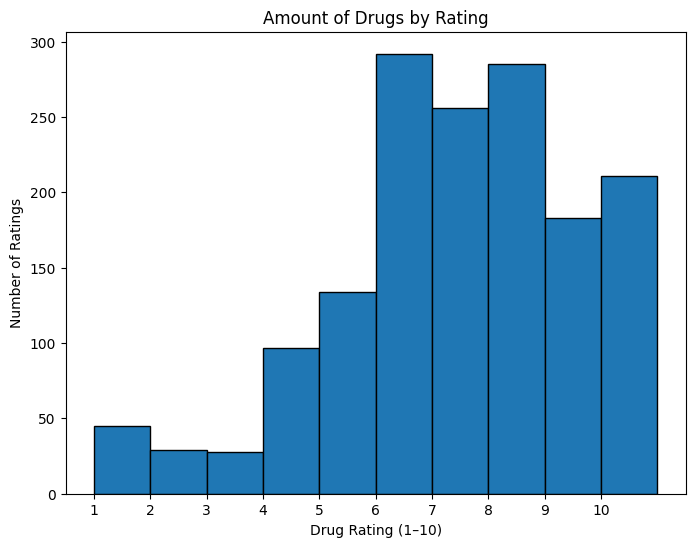

In [82]:
# Let's first look at the distrubution of drug ratings
valid_ratings = (
    pd.to_numeric(data_df_cleaned['rating'], errors='coerce')
    .replace([np.inf, -np.inf], np.nan)
    .dropna()
    .round()
    .astype(int)
)

plt.figure(figsize=(8, 6))
plt.hist(valid_ratings, bins=range(1, 12), edgecolor='black')
plt.xlabel('Drug Rating (1–10)')
plt.ylabel('Number of Ratings')
plt.title('Amount of Drugs by Rating')
plt.xticks(range(1, 11))
plt.show()

In [84]:
# Most popular drugs (based on number of reviews)
reviews_df = drug_context_df.sort_values(by='no_of_reviews', ascending=False)
reviews_df.head(20)

,drug_name,brand_names,generic_name,no_of_reviews,medical_condition_description,related_drugs,activity,drug_link,medical_condition_url
2908,phentermine,"Adipex-P, Lomaira, Suprenza",phentermine,2934.0,Weight Loss (Obesity/Overweight) More than hal...,NaN,95%,https://www.drugs.com/phentermine.html,https://www.drugs.com/condition/obesity.html
2920,bupropion / naltrexone,Contrave,bupropion and naltrexone,2013.0,Weight Loss (Obesity/Overweight) More than hal...,NaN,4%,https://www.drugs.com/mtm/bupropion-and-naltre...,https://www.drugs.com/condition/obesity.html
2910,Contrave,NaN,bupropion and naltrexone,1939.0,Weight Loss (Obesity/Overweight) More than hal...,NaN,23%,https://www.drugs.com/contrave.html,https://www.drugs.com/condition/obesity.html
523,escitalopram,Lexapro,escitalopram,1471.0,Anxiety Other names: Anxiety States; Nerves; N...,NaN,28%,https://www.drugs.com/escitalopram.html,https://www.drugs.com/condition/anxiety.html
2917,Saxenda,Victoza,liraglutide,1377.0,Weight Loss (Obesity/Overweight) More than hal...,NaN,12%,https://www.drugs.com/saxenda.html,https://www.drugs.com/condition/obesity.html
1036,bisacodyl,"Correctol, Doxidan Tablet, Ducodyl, Dulcolax L...",bisacodyl (oral and rectal),1357.0,Constipation Other names: Difficulty passing s...,erythromycin: https://www.drugs.com/erythromyc...,32%,https://www.drugs.com/mtm/bisacodyl-oral-and-r...,https://www.drugs.com/condition/constipation.html
2862,nitrofurantoin,"Macrobid, Macrodantin",nitrofurantoin,1242.0,Urinary Tract Infection Other names: Acute Bac...,NaN,84%,https://www.drugs.com/nitrofurantoin.html,https://www.drugs.com/condition/urinary-tract-...
518,buspirone,"BuSpar, Vanspar",buspirone,1034.0,Anxiety Other names: Anxiety States; Nerves; N...,NaN,55%,https://www.drugs.com/buspirone.html,https://www.drugs.com/condition/anxiety.html
2008,zolpidem,"Ambien, Ambien CR, Edluar, Intermezzo, Zolpimist",zolpidem,1008.0,Insomnia Other names: Difficulty sleeping; Dys...,Belsomra: https://www.drugs.com/belsomra.html ...,58%,https://www.drugs.com/zolpidem.html,https://www.drugs.com/condition/insomnia.html
7,isotretinoin,"Absorica, Accutane, Amnesteem, Claravis, Myori...",isotretinoin (oral),999.0,Acne Other names: Acne Vulgaris; Blackheads; B...,doxycycline: https://www.drugs.com/doxycycline...,26%,https://www.drugs.com/mtm/isotretinoin.html,https://www.drugs.com/condition/acne.html


In [122]:
# Measuring popularity of drug based on activity
activity_df = drug_context_df.sort_values(by='activity', ascending=False)
activity_df.head(20)

,drug_name,brand_names,generic_name,no_of_reviews,medical_condition_description,related_drugs,activity,drug_link,medical_condition_url
1200,Humalog,NaN,insulin lispro,8.0,"Diabetes, Type 1 Other names: Insulin Dependen...",NaN,99%,https://www.drugs.com/humalog.html,https://www.drugs.com/condition/diabetes-melli...
1521,Cialis,Adcirca,tadalafil,448.0,Erectile Dysfunction Other names: ED; Erection...,NaN,99%,https://www.drugs.com/cialis.html,https://www.drugs.com/condition/erectile-dysfu...
416,Aricept,Aricept ODT,donepezil (oral),32.0,Alzheimer's Disease Other names: Presenile Dem...,NaN,98%,https://www.drugs.com/aricept.html,https://www.drugs.com/condition/alzheimer-s-di...
1772,lisinopril,"Prinivil, Qbrelis, Zestril",lisinopril,540.0,High Blood Pressure (Hypertension) Other names...,NaN,98%,https://www.drugs.com/lisinopril.html,https://www.drugs.com/condition/hypertension.html
2802,Keppra,Keppra XR,levetiracetam (oral/injection),182.0,Seizures (Convulsions) Other names: Absence Se...,NaN,98%,https://www.drugs.com/keppra.html,https://www.drugs.com/condition/seizures.html
1638,Zyrtec,NaN,cetirizine,133.0,Allergic Rhinitis Other names: Hay Fever; Nasa...,prednisone: https://www.drugs.com/prednisone.h...,97%,https://www.drugs.com/zyrtec.html,https://www.drugs.com/condition/allergic-rhini...
1399,triamcinolone,"Dermasorb TA, Kenalog, Oralone, Trianex, Tride...",triamcinolone topical,19.0,"Eczema Other names: Atopic Eczema; Dermatitis,...",NaN,97%,https://www.drugs.com/mtm/triamcinolone-topica...,https://www.drugs.com/condition/eczema.html
2067,esterified estrogens / methyltestosterone,"Covaryx, Covaryx HS, EEMT, EEMT HS, Estratest,...",esterified estrogens and methyltestosterone,13.0,Menopausal Disorders Other names: Change of Li...,paroxetine: https://www.drugs.com/paroxetine.h...,97%,https://www.drugs.com/mtm/esterified-estrogens...,https://www.drugs.com/condition/menopausal-dis...
293,Truvada,NaN,emtricitabine and tenofovir disoproxil fumarate,14.0,HIV Infection Other names: Acquired Immune Def...,tenofovir: https://www.drugs.com/mtm/tenofovir...,97%,https://www.drugs.com/truvada.html,https://www.drugs.com/condition/hiv-infection....
1988,oxybutynin,Ditropan XL,oxybutynin (oral),74.0,"Urinary Incontinence Other names: Bladder, Wea...",Myrbetriq: https://www.drugs.com/myrbetriq.htm...,97%,https://www.drugs.com/oxybutynin.html,https://www.drugs.com/condition/urinary-incont...


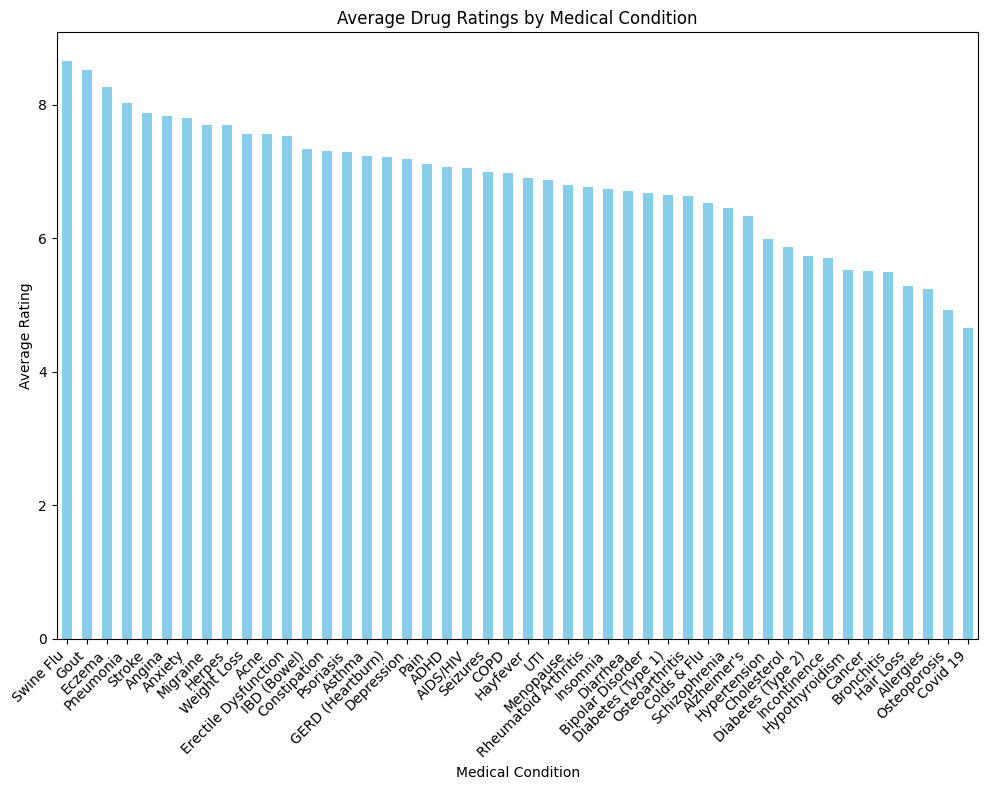

In [121]:
# Lets look at the average drug ratings for each medical condition
avg_ratings = data_df.groupby('medical_condition')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,8))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Drug Ratings by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [129]:
# Rx vs. OTC Comparison
Rx_v_OTC = data_df.groupby('rx_otc')['rating'].mean()
Rx_v_OTC

rx_otc
OTC       6.641964
Rx        6.761142
Rx/OTC    7.250769
Name: rating, dtype: float64

In [130]:
# Impact of Pregnancy Category on Rating or Popularity
pregnancy_df = data_df.groupby('pregnancy_category')['rating'].mean().sort_values(ascending=False)
pregnancy_df

pregnancy_category
N    7.184118
X    6.856122
C    6.843081
B    6.787452
D    6.772973
A    5.525000
Name: rating, dtype: float64

## Exploring Drugs based on Medical Conditions
* Due to the sheer number of drugs and medical conditions lets look more specifically at some meidcal conditions of interest.
#### Medical Conditions of Interest
* Acne - Extremely prevelant in individuals across the world
* Depression - Another leading mental health condition; a major focus of drug research.
* Diabetes (Type 2) - Very prevalent chronic condition, with a wide range of treatments.
* Pain – Broad category that drives high prescription volumes and controversies, especially around opioids.
* Weight Loss – Popular topic with various prescription and OTC treatments; also subject to misuse or off-label use.
* ADHD – Controversial due to stimulant medications, potential misuse, and side effects.
* Cancer – A major disease with many different treatment regimens; always an area of intense research interest.
* AIDS/HIV – Historically stigmatized and still an important global public-health topic with ongoing drug developments.

In [144]:
# Grouping drugs by medical conditons to get a quick overview of the top drugs for each medical condition
# Define medical conditions of interest
conditions_of_interest = ["Acne", "Depression", "Diabetes (Type 2)", 
                          "Pain", "Weight Loss", "ADHD", "Cancer", "AIDS/HIV"]

df_sorted = data_df_cleaned.sort_values(by=["medical_condition", "rating"], ascending=[True, False])

df_top3_all = df_sorted.groupby("medical_condition").head(3)
df_top3_of_interest = df_top3_all[df_top3_all["medical_condition"].isin(conditions_of_interest)]

df_top3_of_interest

,drug_name,medical_condition,side_effects,drug_classes,brand_names,rx_otc,pregnancy_category,csa,alcohol,rating
276,selegiline,ADHD,hives ; difficult breathing; swelling of your ...,"Dopaminergic antiparkinsonism agents, Monoamin...","Eldepryl, Zelapar",Rx,C,N,X,10.0
275,ProCentra,ADHD,hives ; difficulty breathing; swelling of your...,CNS stimulants,Zenzedi,Rx,C,2,X,9.5
260,Desoxyn,ADHD,hives ; difficult breathing; swelling of your ...,"Anorexiants, CNS stimulants",NaN,Rx,C,2,X,9.4
312,Reyataz,AIDS/HIV,sudden dizziness (like you might pass out); se...,Protease inhibitors,NaN,Rx,B,N,NaN,10.0
313,Epzicom,AIDS/HIV,Call your doctor at once if you have symptoms ...,Antiviral combinations,NaN,Rx,C,N,X,10.0
336,atazanavir,AIDS/HIV,sudden dizziness (like you might pass out); se...,Protease inhibitors,Reyataz,Rx,B,N,NaN,10.0
18,Septra,Acne,"skin rash, fever, swollen glands, joint pain, ...",Sulfonamides,Septra DS,Rx,D,N,X,10.0
37,Clindagel,Acne,hives ; difficult breathing; swelling of your ...,Topical acne agents,"Cleocin T, Clindacin ETZ, Clindacin P, Evoclin",Rx,B,N,NaN,10.0
39,erythromycin,Acne,hives ; difficult breathing; swelling of your ...,"Topical acne agents, Topical antibiotics","Emcin Clear, Erygel, Theramycin Z, A/T/S, Eryc...",Rx,B,N,NaN,10.0
726,doxorubicin,Cancer,hives ; difficult breathing; swelling of your ...,Antibiotics / antineoplastics,Adriamycin,Rx,D,N,NaN,10.0


In [147]:
# Explore cancer more as we have weird entry with 1.0 rating in top 3 ratings
cancer_subset = data_df[data_df["medical_condition"] == "Cancer"]
cancer_subset
# We can note that cancer has very few entries which means we should keep this in mind when judging the data's validity in exploring cancer

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
722,carboplatin,Cancer,"Carboplatin may cause unwanted effects, partic...",carboplatin Brand name: Paraplatin,Alkylating agents,Paraplatin,100%,Rx,D,N,NaN,NaN,Cancer Other names: Carcinoma; Malignant Disea...,1.0,2.0,https://www.drugs.com/carboplatin.html,https://www.drugs.com/condition/malignant-dise...
726,doxorubicin,Cancer,hives ; difficult breathing; swelling of your ...,doxorubicin,Antibiotics / antineoplastics,Adriamycin,22%,Rx,D,N,NaN,Kisqali: https://www.drugs.com/kisqali.html | ...,Cancer Other names: Carcinoma; Malignant Disea...,10.0,2.0,https://www.drugs.com/mtm/doxorubicin.html,https://www.drugs.com/condition/malignant-dise...
729,vincristine,Cancer,hives ; difficult breathing; swelling of your ...,vincristine,Mitotic inhibitors,"Vincasar PFS, Oncovin",13%,Rx,D,N,NaN,NaN,Cancer Other names: Carcinoma; Malignant Disea...,10.0,1.0,https://www.drugs.com/mtm/vincristine.html,https://www.drugs.com/condition/malignant-dise...
736,ifosfamide,Cancer,"fever, chills, flu symptoms; mouth and throat ...",ifosfamide,Alkylating agents,Ifex,6%,Rx,D,N,X,Keytruda: https://www.drugs.com/keytruda.html ...,Cancer Other names: Carcinoma; Malignant Disea...,1.0,1.0,https://www.drugs.com/mtm/ifosfamide.html,https://www.drugs.com/condition/malignant-dise...


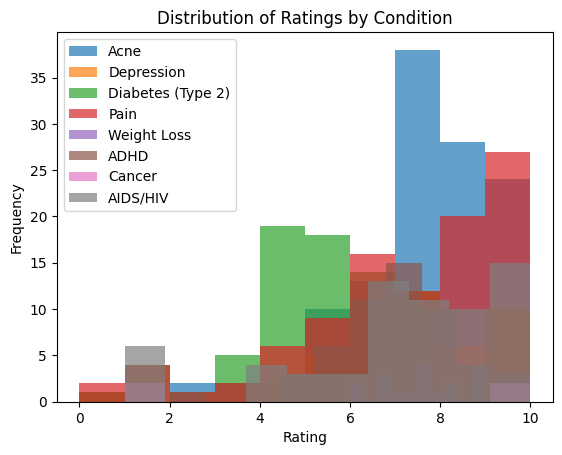

In [108]:
# Lets look at the rating distributions for each medical condition
conditions_of_interest = ["Acne", "Depression", "Diabetes (Type 2)", 
                          "Pain", "Weight Loss", "ADHD", "Cancer", "AIDS/HIV"]

for condition in conditions_of_interest:
    subset = data_df[data_df['medical_condition'] == condition]
    plt.hist(subset['rating'], bins=10, alpha=0.7, label=condition)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings by Condition')
plt.legend()
plt.show()

In [125]:
# Lets look at the most common (5) side effects for each medical condition
def get_side_effects(text):
    if pd.isna(text):
        return []
    return [effect.strip() for effect in text.split(';')]

conditions_of_interest = ["Acne", "Depression", "Diabetes (Type 2)",
                          "Pain", "Weight Loss", "ADHD", "Cancer", "AIDS/HIV"]

for condition in conditions_of_interest:
    subset_df = data_df[data_df['medical_condition'] == condition]
    side_effects = []
    
    # Collect all side effects for the given condition
    for se_text in subset_df['side_effects']:
        side_effects.extend(get_side_effects(se_text))
    
    # Once the loop is done, count and display the top 5
    counter = Counter(side_effects)
    most_common_side_effects = counter.most_common(5)
    
    print(condition)
    print(most_common_side_effects)
    print("------------")

Acne
[('hives', 62), ('difficult breathing', 42), ('difficult breathing, feeling light-headed', 17), ('swelling in your hands, ankles, or feet', 15), ('breast tenderness', 15)]
------------
Depression
[('hives', 25), ('difficult breathing', 20), ('a light-headed feeling, like you might pass out', 14), ('difficulty breathing', 13), ('painful or difficult urination', 8)]
------------
Diabetes (Type 2)
[('hives', 40), ('difficult breathing', 37), ('headache', 17), ('severe or ongoing pain in your joints', 14), ('feeling cold', 12)]
------------
Pain
[('hives', 72), ('difficult breathing', 34), ('a light-headed feeling, like you might pass out', 33), ('difficulty breathing', 25), ('a slow heart rate or weak pulse', 16)]
------------
Weight Loss
[('hives', 12), ('difficult breathing', 11), ('chest pain, feeling like you might pass out', 4), ('swelling in your ankles or feet', 4), ('pounding heartbeats or fluttering in your chest', 4)]
------------
ADHD
[('hives', 37), ('difficult breathing'

## Creating a Drug Score
* The goal of this to create our own metric to assess the effectiveness of specifc drugs for key medical conditions
* We are going to do this by quantifying and weighting the various drug statistics we have available

| **Statistic**              | **Possible Values / Range**                               | **Weighting Factor** |
|-------------------------|-----------------------------------------------------------|-----------|
| **Rating**             | 1–10                                                      | 4.5       |
| **Rx–OTC**             | Rx = 2, Rx/OTC = 1, OTC = 0                               | 5.0       |
| **CSA (Abuse Potential)** | 1–5, N/A (0)                                           | 6.0       |
| **Pregnancy Category**  | A = 5, B = 4, C = 3, D = 2, X = 1                          | 3.0       |
| **Alcohol Interaction** | 0 (No interaction), 1 (Interaction)                      | 2.5       |


### Columns of Interest (KPI)
* Rating 
* CSA 
* Side Effects 
* Alcohol Compatibility
* Pregnancy Category 
* Rx-to-OTC 

### Side Effects - Assigning a Severity Score
* 1 = Mild (e.g. headache, nausea)
* 2 = Moderate (e.g. rash, dizziness, hives)
* 3 = Significant (e.g. swelling, moderate breathing issues)
* 4 = Serious (e.g. seizures, severe allergic reactions)
* 5 = Life-threatening (e.g. anaphylaxis, difficulty breathing, heart attack)

In [126]:
# Lets first isolate common side effects and see which are the most common
conditions_of_interest = ["Acne", "Depression", "Diabetes (Type 2)",
                          "Pain", "Weight Loss", "ADHD", "Cancer", "AIDS/HIV"]

subset_df = data_df[data_df['medical_condition'].isin(conditions_of_interest)]

side_effects_all = []
for se_text in subset_df['side_effects']:
    side_effects_all.extend(get_side_effects(se_text))

counter = Counter(side_effects_all)
most_common_side_effects = counter.most_common(20)
print(most_common_side_effects)

[('hives', 271), ('difficult breathing', 191), ('difficulty breathing', 73), ('a light-headed feeling, like you might pass out', 60), ('trouble speaking or swallowing, problems with balance or eye movement, weakness or prickly feeling', 52), ('headache', 45), ('itching', 26), ('WARNING/CAUTION: Even though it may be rare, some people may have very bad and sometimes deadly side effects when taking a drug. Tell your doctor or get medical help right away if you have any of the following signs or symptoms that may be related to a very bad side effect: Signs of an allergic reaction, like rash', 25), ('red, swollen, blistered, or peeling skin with or without fever', 25), ('wheezing', 25), ('tightness in the chest or throat', 25), ('trouble breathing, swallowing, or talking', 25), ('unusual hoarseness', 25), ('a seizure', 24), ('rash', 24), ('a seizure (convulsions)', 23), ('sleep problems ( insomnia )', 23), ('or changes in the shape or location of body fat (especially in your arms, legs, fa

In [167]:
# Next we are going to assign a severity score for the top 20 side effects
# Note this is fairly subjective in our rating so we are taking the side effects listing as an average
# (e.g., a rash can be mild or life-threatening so we are assuming an average case)

side_effect_severity = {
    "hives": 2,
    "difficulty breathing": 5,
    "headache": 1,
    "itching": None,
    "WARNING/CAUTION: Even though it may be rare, some people may have very bad and sometimes deadly side effects when taking a drug. Tell your doctor or get medical help right away if you have any of the following signs or symptoms that may be related to a very bad side effect: Signs of an allergic reaction, like rash": 5,
    "red, swollen, blistered, or peeling skin with or without fever": 2,
    "wheezing": 1,
    "tightness in the chest or throat": 3,
    "trouble breathing, swallowing, or talking": 3,
    "unusual hoarseness": 2,
    "a seizure": 5,
    "rash": 2,
    "a seizure (convulsions)": 5,
    "sleep problems ( insomnia )": 3,
    "or changes in the shape or location of body fat (especially in your arms, legs, face, neck, breasts, and waist).": 3,
    "headache , dizziness": 2,
    "seizure (convulsions)": 4,
    None: 0
}

top_side_effects = [
    "hives",
    "difficulty breathing",
    "headache",
    "itching",
    "WARNING/CAUTION: Even though it may be rare, some people may have very bad and sometimes deadly side effects when taking a drug. Tell your doctor or get medical help right away if you have any of the following signs or symptoms that may be related to a very bad side effect: Signs of an allergic reaction, like rash",
    "red, swollen, blistered, or peeling skin with or without fever",
    "wheezing",
    "tightness in the chest or throat",
    "trouble breathing, swallowing, or talking",
    "unusual hoarseness",
    "a seizure",
    "rash",
    "a seizure (convulsions)",
    "sleep problems ( insomnia )",
    "or changes in the shape or location of body fat (especially in your arms, legs, face, neck, breasts, and waist).",
    "headache , dizziness",
    "seizure (convulsions)"
]  
# Store results
side_effect_scores = {}

for effect in top_side_effects:
    score = side_effect_severity.get(effect, 1)  # default = 1 if missing
    side_effect_scores[effect] = score

side_effect_scores

{'hives': 2,
 'difficulty breathing': 5,
 'headache': 1,
 'itching': None,
 'WARNING/CAUTION: Even though it may be rare, some people may have very bad and sometimes deadly side effects when taking a drug. Tell your doctor or get medical help right away if you have any of the following signs or symptoms that may be related to a very bad side effect: Signs of an allergic reaction, like rash': 5,
 'red, swollen, blistered, or peeling skin with or without fever': 2,
 'wheezing': 1,
 'tightness in the chest or throat': 3,
 'trouble breathing, swallowing, or talking': 3,
 'unusual hoarseness': 2,
 'a seizure': 5,
 'rash': 2,
 'a seizure (convulsions)': 5,
 'sleep problems ( insomnia )': 3,
 'or changes in the shape or location of body fat (especially in your arms, legs, face, neck, breasts, and waist).': 3,
 'headache , dizziness': 2,
 'seizure (convulsions)': 4}

### Pregnancy Category
* A = Adequate and well-controlled studies have failed to demonstrate a risk to the fetus in the first trimester of pregnancy (and there is no evidence of risk in later trimesters).
* B = Animal reproduction studies have failed to demonstrate a risk to the fetus and there are no adequate and well-controlled studies in pregnant women.
* C = Animal reproduction studies have shown an adverse effect on the fetus and there are no adequate and well-controlled studies in humans, but potential benefits may warrant use in pregnant women despite potential risks.
* D = There is positive evidence of human fetal risk based on adverse reaction data from investigational or marketing experience or studies in humans, but potential benefits may warrant use in pregnant women despite potential risks.
* X = Studies in animals or humans have demonstrated fetal abnormalities and/or there is positive evidence of human fetal risk based on adverse reaction data from investigational or marketing experience, and the risks involved in use in pregnant women clearly outweigh potential benefits.
* N = FDA has not classified the drug.

In [168]:
# Let's do the same thing and create a score metric for pregnancy category
pregnancy_scores = {
    "A": 5,
    "B": 4,
    "C": 3,
    "D": 2,
    "X": 1,
    "N": np.nan,
    None: 0
}
pregnancy_scores

{'A': 5, 'B': 4, 'C': 3, 'D': 2, 'X': 1, 'N': nan, None: 0}

### CSA (Controlled Substances Act)
* 1 = Has a high potential for abuse. Has no currently accepted medical use in treatment in the United States. There is a lack of accepted safety for use under medical supervision.
* 2 = Has a high potential for abuse. Has a currently accepted medical use in treatment in the United States or a currently accepted medical use with severe restrictions. Abuse may lead to severe psychological or physical dependence.
* 3 = Has a potential for abuse less than those in schedules 1 and 2. Has a currently accepted medical use in treatment in the United States. Abuse may lead to moderate or low physical dependence or high psychological dependence.
* 4 = Has a low potential for abuse relative to those in schedule 3. It has a currently accepted medical use in treatment in the United States. Abuse may lead to limited physical dependence or psychological dependence relative to those in schedule 3.
* 5 = Has a low potential for abuse relative to those in schedule 4. Has a currently accepted medical use in treatment in the United States. Abuse may lead to limited physical dependence or psychological dependence relative to those in schedule 4.

In [166]:
# We will do the same thing for CSA as well (which is intepreted as potential for drug abuse) 
# Since in this case hte lower score is worse (more abuse) we will invert the scoring
csa_scores = {
    "1": 5,
    "2": 4,
    "3": 3,
    "4": 2,
    "5": 1,
    None: 0
}
csa_scores

{'1': 5, '2': 4, '3': 3, '4': 2, '5': 1, None: 0}

### Rx-OTC Scores
* Rx - drug available by prescription only
* Rx/OTC - drug available either over the counter or by prescription
* OTC - drug available over-the-counter

In [171]:
# We will then value Rx-OTC scores penalizing prescription (Rx) as it assumes less availability/affordability
# (Note: this measure is widely subjective and generalized so we will handle this effect more in depth later on)
rx_otc_scores = {
    "Rx": 0,
    "Rx/OTC": 1,
    "OTC": 2,
    None: 0
}
rx_otc_scores

{'Rx': 0, 'Rx/OTC': 1, 'OTC': 2, None: 0}

### Alcohol Compatability
* X - Interacts with Alcohol
* NaN - Does not interact with Alcohol

In [172]:
# Creating binary value for alcohol compatability
alcohol_score = {
    "X": 0,
    "NaN": 1,
    np.nan: 1,
    None: 0
}
alcohol_score

{'X': 0, 'NaN': 1, nan: 1, None: 0}

In [184]:
# Let's make the score function

# Factors fors the point system
WEIGHTS = {
    "rating": 4.5,
    "rx_otc": 5.0,      
    "csa": 3.0,         
    "pregnancy": 1.5,   
    "alcohol": 2.5,
}

def compute_drug_score(row):
    """
    Returns a numeric 'drug_score' that combines:
      rating + pregnancy_score + csa_score + rx_otc_score + alcohol_score
    """

    # 1) Rating (already numeric, e.g. 1–10). Use 0 if missing
    rating_val = row.get('rating', 0) or 0

    # 2) Pregnancy category
    preg_key = row.get('pregnancy_category', None)
    preg_score = pregnancy_scores.get(preg_key, np.nan)
    if np.isnan(preg_score):
        preg_score = 0  # or however you want to handle missing/unknown

    # 3) CSA schedule
    csa_key = str(row.get('csa', None))  # ensure it's a string, e.g. '1'
    csa_score_val = csa_scores.get(csa_key, np.nan)
    if np.isnan(csa_score_val):
        csa_score_val = 0

    # 4) Rx/OTC
    rx_otc_key = row.get('rx_otc', None)
    rx_otc_score_val = rx_otc_scores.get(rx_otc_key, 0)

    # 5) Alcohol
    alc_key = row.get('alcohol', 'NaN')  # default to "NaN" if none
    alc_score_val = alcohol_score.get(str(alc_key), 0)

    # Simple additive formula
    drug_score = rating_val*4.5 + preg_score*1.5 + csa_score_val*3 + rx_otc_score_val*5 + alc_score_val*2.5

    return drug_score

In [186]:
data_df = data_df.copy()
data_df['drug_score'] = data_df.apply(compute_drug_score, axis=1)
data_df[['drug_name', 'rating', 'pregnancy_category', 'csa', 'rx_otc', 'alcohol', 'drug_score']]

,drug_name,rating,pregnancy_category,csa,rx_otc,alcohol,drug_score
0,doxycycline,6.8,D,N,Rx,X,33.60
1,spironolactone,7.2,C,N,Rx,X,36.90
2,minocycline,5.7,D,N,Rx,NaN,28.65
3,Accutane,7.9,X,N,Rx,X,37.05
4,clindamycin,7.4,B,N,Rx,NaN,39.30
...,...,...,...,...,...,...,...
2921,phentermine / topiramate,7.8,X,4,Rx,X,42.60
2922,Bontril PDM,6.0,C,3,Rx,X,40.50
2923,chorionic gonadotropin (hcg),7.0,X,N,Rx,NaN,33.00
2924,Lomaira,7.6,X,4,Rx,X,41.70


In [187]:
# Now lets sort by overall drug score
data_df_sorted = data_df.sort_values('drug_score', ascending=False)
data_df_sorted[['drug_name', 'drug_score', 'rating', 
                'pregnancy_category', 'csa', 'rx_otc', 'alcohol']].head(20)


,drug_name,drug_score,rating,pregnancy_category,csa,rx_otc,alcohol
2461,alfentanil,61.50,10.0,C,2,Rx,X
2579,Xodol,61.50,10.0,C,2,Rx,X
1596,Axid AR,61.00,10.0,B,N,OTC,NaN
1569,Pepcid AC Chewable Tablets,61.00,10.0,B,N,OTC,NaN
2412,AneCream,61.00,10.0,B,N,OTC,NaN
2416,Bactine,61.00,10.0,B,N,OTC,NaN
1056,Fleet Bisacodyl,61.00,10.0,B,N,OTC,NaN
1227,Novolin 70/30,61.00,10.0,B,N,OTC,X
1239,insulin isophane,61.00,10.0,B,N,OTC,X
2441,Medi-Quik Spray,61.00,10.0,B,N,OTC,NaN


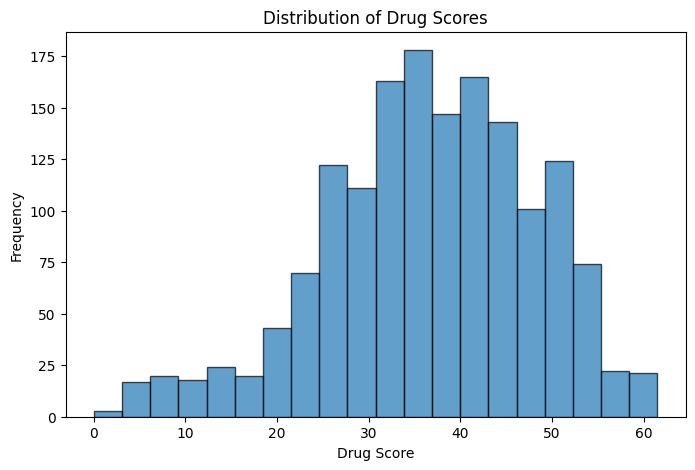

In [190]:
# Let's look at the distribution
plt.figure(figsize=(8, 5))
plt.hist(data_df['drug_score'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Drug Scores")
plt.xlabel("Drug Score")
plt.ylabel("Frequency")
plt.show()

## Drug Performance per Medical Condition (based on our drug-score metric)

In [192]:
# Now that we have a working drug score we can determine based on our metric what the best durgs are for each medical condition of interest
df_sorted = data_df.sort_values(by=["medical_condition", "drug_score"], ascending=[True, False])

top_5_by_condition = df_sorted.groupby("medical_condition").head(5)

conditions_of_interest = ["Acne", "Depression", "Diabetes (Type 2)", 
                          "Pain", "Weight Loss", "ADHD", "Cancer", "AIDS/HIV"]

top_5_by_condition_of_interest = top_5_by_condition[
    top_5_by_condition["medical_condition"].isin(conditions_of_interest)
]

# Display the top 5 in your columns of interest
top_5_by_condition_of_interest[
    ["medical_condition", "drug_name", "drug_score", "rating", "rx_otc", "csa", "pregnancy_category", "alcohol"]
]

,medical_condition,drug_name,drug_score,rating,rx_otc,csa,pregnancy_category,alcohol
275,ADHD,ProCentra,59.25,9.5,Rx,2,C,X
260,ADHD,Desoxyn,58.80,9.4,Rx,2,C,X
270,ADHD,methamphetamine,56.10,8.8,Rx,2,C,X
247,ADHD,Jornay PM,55.65,8.7,Rx,2,C,X
253,ADHD,Dexedrine,55.20,8.6,Rx,2,C,X
312,AIDS/HIV,Reyataz,51.00,10.0,Rx,N,B,NaN
336,AIDS/HIV,atazanavir,51.00,10.0,Rx,N,B,NaN
353,AIDS/HIV,Tivicay PD,51.00,10.0,Rx,N,B,NaN
313,AIDS/HIV,Epzicom,49.50,10.0,Rx,N,C,X
297,AIDS/HIV,Stribild,48.75,9.5,Rx,N,B,NaN
